# Plot ocean data

In the second cell below, enter the longitude and latitude ranges of your box in the variables `lon_min`, `lon_max`, `lat_min`, `lat_max`, below.  I recommend first running the whole notebook (the default box coordinates are for the near-global ocean).  Then, enter your region's coordinates and from the menu above, select `Kernel -> Restart & Run All`

You do not need to understand how this code works.  The plots are being made in Ferret, a specialized and open source oceanographic data handling package developed by NOAA.  If you are (optionally) curious about the code, some general rules of thumb:

+ `@AVE` => take the average over the course of the year.
+ `@SBX` => smooth the data with a "boxcar" filter to remove some noise.
+ `shade` => create a colorshaded map
+ `contour /over` => contour plot overlay

**References for data sets are below.**

In [1]:
#=================================================================
# This first cell contains some necessary initialization commands.
#=================================================================
import sys
sys.path.append('/mnt/local/pyferret/lib/python3.6/site-packages')
import pyferret
import numpy as np
pyferret.addenv(FER_DIR='/mnt/local/pyferret', FER_DAT='/mnt/local/FerretDatasets')
pyferret.start(journal=False, quiet=True, unmapped=True)
%load_ext ferretmagic

! Enter_GO fland
! Exit_GO


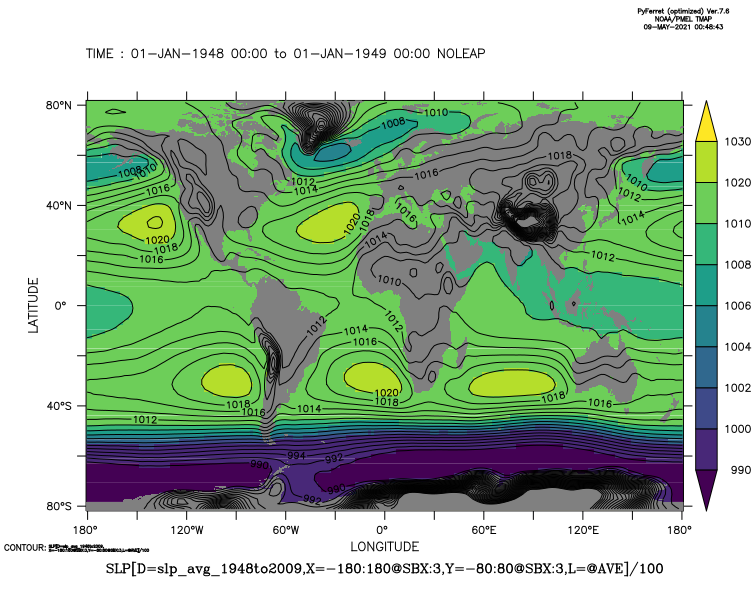

In [2]:
%%ferret
!=============Set region limits here==============
let lon_min = -180
let lon_max = 180
let lat_min = -80
let lat_max = 80
!=================================================

let lon_mid = (`lon_min` + `lon_max`)/2
let lat_mid = (`lat_min` + `lat_max`)/2

! Load sea level pressure (SLP) and make figure.
! SLP is often presented in units of milibars on
! weather maps, so convert Pascals to milibar.
use /mnt/courses/eos2585/CORE2/clims/slp_avg_1948to2009.nc
shade /levels=10V slp[d=1,x=`lon_min`:`lon_max`@SBX:3,y=`lat_min`:`lat_max`@SBX:3,l=@AVE]/100; go fland
contour /over /levels=(990,1050,2) slp[d=1,x=`lon_min`:`lon_max`@SBX:3,y=`lat_min`:`lat_max`@SBX:3,l=@AVE]/100

! Enter_GO fland
! Exit_GO


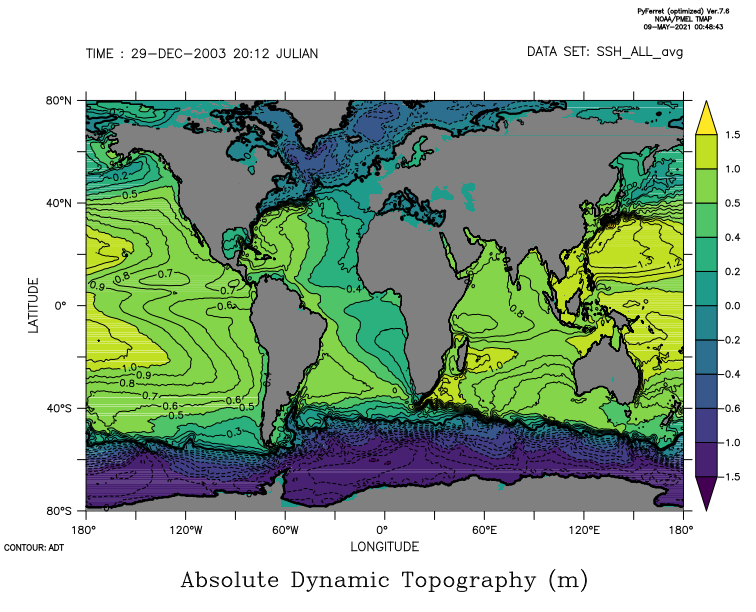

In [3]:
%%ferret

! Load sea surface height (SSH) data and make map.
! SSH is more precisely known as absolute dynamic 
! topography (ADT)
use /mnt/courses/eos2680/AVISO/SSH_ALL_avg.cdf

shade /levels=10V adt[d=2,x=`lon_min`:`lon_max`,y=`lat_min`:`lat_max`]; go fland
contour /over /levels=(-inf)(-2,2,0.1)(inf) adt[d=2,x=`lon_min`:`lon_max`,y=`lat_min`:`lat_max`]

! Enter_GO fland
! Exit_GO


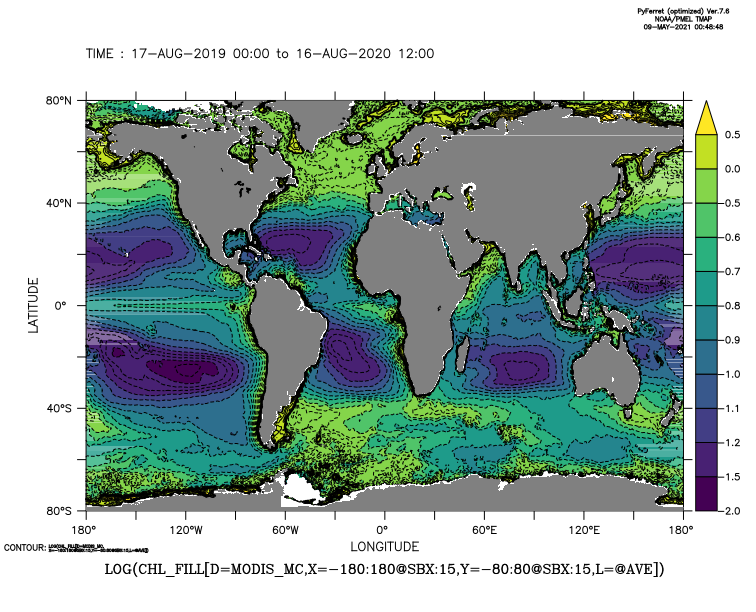

In [4]:
%%ferret

! Load sea surface color and make a map.
! DATA ARE BEING PLOTTED ON A LOG_10 SCALE!

use /mnt/courses/eos1505/MODIS/MODIS_MC.cdf
set memory /size=8000
shade /levels=10V log(chl_fill[d=3,x=`lon_min`:`lon_max`@SBX:15,y=`lat_min`:`lat_max`@SBX:15,l=@AVE]); go fland
contour /over /levels=(-2,2,0.1) log(chl_fill[d=3,x=`lon_min`:`lon_max`@SBX:15,y=`lat_min`:`lat_max`@SBX:15,l=@AVE])

! Enter_GO left_axis_plot chl_fill[d=3,x=-180:180@AVE,y=-80:80@AVE]
! Exit_GO
! Enter_GO right_axis_plot light[d=4,x=-180:180@AVE,y=-80:80@AVE]
! Exit_GO


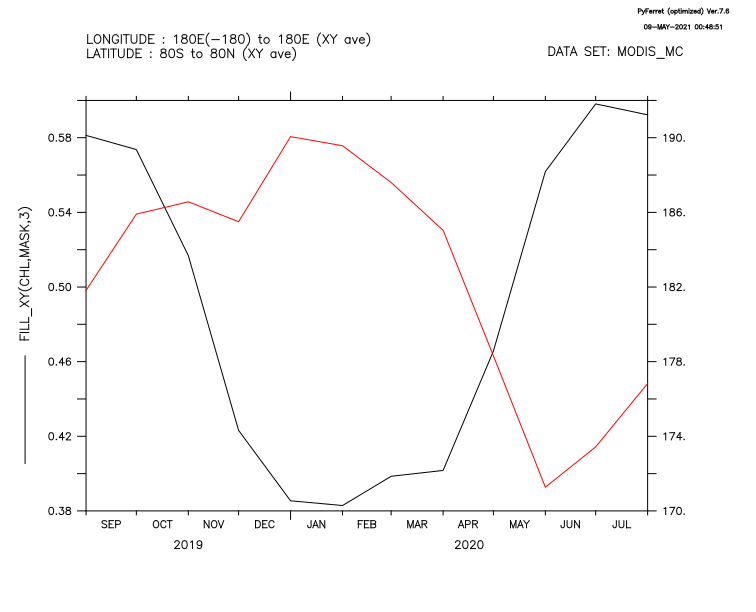

In [5]:
%%ferret

! Load the light climatology and plot light (red) along with chlorophyll (black)
use /mnt/courses/eos2680/NASA_SRB/light_clim.nc

! Plot the seasonal cycle of surface chlorophyll averaged over the box.
go left_axis_plot chl_fill[d=3,x=`lon_min`:`lon_max`@AVE,y=`lat_min`:`lat_max`@AVE]
go right_axis_plot light[d=4,x=`lon_min`:`lon_max`@AVE,y=`lat_min`:`lat_max`@AVE]

In [6]:
%%ferret
sh d
!let file_list = SPAWN("ls -1 /mnt/courses/eos2680/NASA_SRB/srb_*_monthly_??.nc")
!TSERIES light_clim = file_list
!save /clobber /file=light_clim.nc light[l=1:12]


currently SET data sets:
 1> /mnt/courses/eos2585/CORE2/clims/slp_avg_1948to2009.nc
 name title I J K L
 SLP Sea Level Pressure 1:192 1:94 ... 1:1460
 TIME_BNDS
 1:2 ... ... 1:1460
 (invalid axis bounds)
 
 2> /mnt/courses/eos2680/AVISO/SSH_ALL_avg.cdf
 name title I J K L
 CRS ... ... ... ...
 ADT Absolute Dynamic Topography 1:1440 1:720 ... 1:1
 
 3> /mnt/courses/eos1505/MODIS/MODIS_MC.cdf
 name title I J K L
 CHL_FILL FILL_XY(CHL,MASK,3) 1:4320 1:2160 ... 1:12
 
 4> /mnt/courses/eos2680/NASA_SRB/light_clim.nc (default)
 name title I J K L
 LIGHT light 1:360 1:180 ... 1:12

# References

+ Sea surface color (climatologies and near-real time) from satellites is from the [MODIS sensor on NASA's Aqua satellite](https://modis.gsfc.nasa.gov/data/dataprod/chlor_a.php) most easily accessed by [this interactive viewer](https://oceancolor.gsfc.nasa.gov/l3/).  The formal citation for the MODIS sea surface color data is:

Hu, C., Lee Z., and Franz, B.A. (2012). Chlorophyll-a algorithms for oligotrophic oceans:A novel approach based on three-band reflectance difference, J. Geophys. Res., 117, C01011, doi:10.1029/2011JC007395.

+ Climatological light input data were obtained from the [NASA Langley Research Center Atmospheric Science Data Center](https://asdc.larc.nasa.gov/project/SRB/SRB_REL3.0_LPSA_MONTHLY_NC_1):

Kato, Seiji (2007) A Long-Term TOA and Constrained Surface Radiation Budget Dataset Using Merged CERES, ERBE and ISCCP/SRB Products from the Past 30 Years, https://earthdata.nasa.gov/esds/competitive-programs/measures/long-term-toa-and-constrained-surface-radiation-budget-dataset, doi:10.5067/SRB/REL3.0_LPSA_MONTHLY_NC_L3, downloaded Nov. 22, 2020.

+ Climatological sea level pressure (SLP) are averaged over the 1948-2009 CORE2 data downloaded from [NOAA GFDL](https://data1.gfdl.noaa.gov/nomads/forms/core/COREv2.html) as prepared by Large and Yeager (2009):

Large, W., & Yeager, S. G. (2009). The global climatology of an interannually varying air–sea flux data set. Climate dynamics, 33(2-3), 341-364.

+ Climatological sea surface height (SSH) was constructed from the 1992-2014 mean of absolute dynamic topography provided by AVISO.  These products were processed by SSALTO/DUACS and distributed by [AVISO+](https://www.aviso.altimetry.fr) with support from CNES.

